In [ ]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
stacked_encoder = keras.models.Sequential([
                                           keras.layers.Flatten(input_shape=[28,28]),
                                           keras.layers.Dense(100,activation = 'elu'),
                                           keras.layers.Dense(30, activation = 'elu'),
])

In [ ]:
stacked_decoder = keras.models.Sequential([
                                           keras.layers.Dense(100, activation = 'elu', input_shape=[30]),
                                           keras.layers.Dense(28*28, activation = 'sigmoid'),
                                           keras.layers.Reshape([28,28])
])

In [ ]:
stacked_autoencoder = keras.models.Sequential([stacked_encoder,stacked_decoder])

In [ ]:
stacked_autoencoder.compile(loss ='binary_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 1.5)) 

In [ ]:
history = stacked_autoencoder.fit(X_train, X_train, epochs=10, validation_data = [X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1932 - val_loss: 0.1491
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1373 - val_loss: 0.1267
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1226 - val_loss: 0.1202
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1167 - val_loss: 0.1154
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1136 - val_loss: 0.1116
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1111 - val_loss: 0.1108
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1091 - val_loss: 0.1086
Epoch 8/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1073 - val_loss: 0.1057
Epoch 9/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1054 - val_loss: 0.1049
Epoch 10/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap='binary')
  plt.axis('off')

In [ ]:
def show_reconstruction(model, n_images=5):
  reconstructions = model.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(X_valid[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

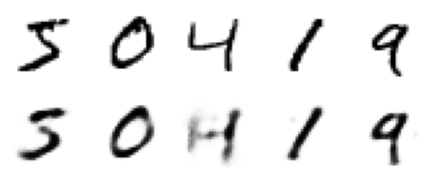

In [ ]:
show_reconstruction(stacked_autoencoder)